In [1]:
import random
import numpy as np
import pandas as pd
import polars as pl

In [2]:
import glob
import os
from os import listdir, walk
from os.path import join, split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
class CFG:
    random_seed = 42
    dir = "/home/nick/Projects/kaggle/march_mania_24/data/"

In [6]:
def load_df(df_name, describe=False):
    df = pl.read_csv(join(CFG.dir, f"{df_name}.csv"), ignore_errors=True)
    print("\n"+"*"*50)
    print(f"DATASET NAME: {df_name}")
    print(f"SHAPE: {df.shape}")
    print(f"\nMEMORY USAGE: {df.estimated_size('b')} bytes")
    print("\nDISPLAY\n")
    display(df.head(3))
    if describe:
        print("\nDESCRIBE\n")
        display(df.describe())
    return df

In [7]:
cities = load_df("Cities")
conferences = load_df("Conferences")
forecasts = load_df("fivethirtyeight_ncaa_forecasts_2023")
tourney_seeds = load_df("2024_tourney_seeds")
tourney_slots = load_df('MNCAATourneySlots')


**************************************************
DATASET NAME: Cities
SHAPE: (483, 3)

MEMORY USAGE: 20097 bytes

DISPLAY



CityID,City,State
i64,str,str
4001,"""Abilene""","""TX"""
4002,"""Akron""","""OH"""
4003,"""Albany""","""NY"""



**************************************************
DATASET NAME: Conferences
SHAPE: (51, 2)

MEMORY USAGE: 2819 bytes

DISPLAY



ConfAbbrev,Description
str,str
"""a_sun""","""Atlantic Sun C…"
"""a_ten""","""Atlantic 10 Co…"
"""aac""","""American Athle…"



**************************************************
DATASET NAME: fivethirtyeight_ncaa_forecasts_2023
SHAPE: (1632, 18)

MEMORY USAGE: 309504 bytes

DISPLAY



gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,results_to,team_alive,team_id,team_name,team_rating,team_region,team_seed,team_slot
str,str,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,str,f64,str,str,i64
"""mens""","""2023-04-01""",0,1.0,1.0,1.0,1.0,1.0,1.0,0.699181,6,1,41,"""Connecticut""",96.43,"""West""","""4""",76
"""mens""","""2023-04-01""",0,1.0,1.0,1.0,1.0,1.0,1.0,0.300819,6,1,21,"""San Diego Stat…",91.39,"""South""","""5""",8
"""mens""","""2023-04-01""",0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7,0,2226,"""Florida Atlant…",87.52,"""East""","""9""",38



**************************************************
DATASET NAME: 2024_tourney_seeds
SHAPE: (128, 3)

MEMORY USAGE: 5120 bytes

DISPLAY



Tournament,Seed,TeamID
str,str,i64
"""M""","""W01""",1345
"""M""","""W02""",1266
"""M""","""W03""",1243



**************************************************
DATASET NAME: MNCAATourneySlots
SHAPE: (2452, 4)

MEMORY USAGE: 137312 bytes

DISPLAY



Season,Slot,StrongSeed,WeakSeed
i64,str,str,str
1985,"""R1W1""","""W01""","""W16"""
1985,"""R1W2""","""W02""","""W15"""
1985,"""R1W3""","""W03""","""W14"""


In [8]:
mens_datasets = [i.split(".csv")[0]
                 for i in os.listdir(CFG.dir)
                 if i.startswith("M")]
mens_datasets

['MGameCities',
 'MSecondaryTourneyCompactResults',
 'MMasseyOrdinals_partac',
 'MSecondaryTourneyTeams',
 'MSeasons',
 'MMasseyOrdinals_partaa',
 'MTeamSpellings',
 'MRegularSeasonDetailedResults',
 'MTeamConferences',
 'MTeamCoaches',
 'MRegularSeasonCompactResults',
 'MMasseyOrdinals_partab',
 'MNCAATourneyDetailedResults',
 'MNCAATourneySeeds',
 'MTeams',
 'MNCAATourneySlots',
 'MConferenceTourneyGames',
 'MNCAATourneySeedRoundSlots',
 'MNCAATourneyCompactResults']

In [9]:
mSeedRoundSlots = load_df("MNCAATourneySeedRoundSlots")
mRegSeasonResults = load_df("MRegularSeasonDetailedResults")
mGameCities = load_df('MGameCities')
mSeasons = load_df('MSeasons')
mTeamSpellings = load_df('MTeamSpellings')
mMassey_partaa = load_df('MMasseyOrdinals_partaa')
mMassey_partab = load_df('MMasseyOrdinals_partab')
mMassey_partac = load_df('MMasseyOrdinals_partac')
mTourneySeeds = load_df('MNCAATourneySeeds')
mTeamCoaches = load_df('MTeamCoaches')
mConfTourneyGames = load_df('MConferenceTourneyGames')
mTourneyResults = load_df('MNCAATourneyDetailedResults')
mTeamConferences = load_df('MTeamConferences')
mTeams = load_df('MTeams')


**************************************************
DATASET NAME: MNCAATourneySeedRoundSlots
SHAPE: (720, 5)

MEMORY USAGE: 40320 bytes

DISPLAY



Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
str,i64,str,i64,i64
"""W01""",1,"""R1W1""",136,137
"""W01""",2,"""R2W1""",138,139
"""W01""",3,"""R3W1""",143,144



**************************************************
DATASET NAME: MRegularSeasonDetailedResults
SHAPE: (111817, 34)

MEMORY USAGE: 31308760 bytes

DISPLAY



Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2003,10,1104,68,1328,62,"""N""",0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
2003,10,1272,70,1393,63,"""N""",0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2003,11,1266,73,1437,61,"""N""",0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23



**************************************************
DATASET NAME: MGameCities
SHAPE: (79483, 6)

MEMORY USAGE: 4451048 bytes

DISPLAY



Season,DayNum,WTeamID,LTeamID,CRType,CityID
i64,i64,i64,i64,str,i64
2010,7,1143,1293,"""Regular""",4027
2010,7,1314,1198,"""Regular""",4061
2010,7,1326,1108,"""Regular""",4080



**************************************************
DATASET NAME: MSeasons
SHAPE: (40, 6)

MEMORY USAGE: 3534 bytes

DISPLAY



Season,DayZero,RegionW,RegionX,RegionY,RegionZ
i64,str,str,str,str,str
1985,"""10/29/1984""","""East""","""West""","""Midwest""","""Southeast"""
1986,"""10/28/1985""","""East""","""Midwest""","""Southeast""","""West"""
1987,"""10/27/1986""","""East""","""Southeast""","""Midwest""","""West"""



**************************************************
DATASET NAME: MTeamSpellings
SHAPE: (1165, 2)

MEMORY USAGE: 36642 bytes

DISPLAY



TeamNameSpelling,TeamID
str,i64
"""a&m-corpus chr…",1394
"""a&m-corpus chr…",1394
"""abilene chr""",1101



**************************************************
DATASET NAME: MMasseyOrdinals_partaa
SHAPE: (2386744, 5)

MEMORY USAGE: 114563712 bytes

DISPLAY



Season,RankingDayNum,SystemName,TeamID,OrdinalRank
i64,i64,str,i64,i64
2003,35,"""SEL""",1102,159
2003,35,"""SEL""",1103,229
2003,35,"""SEL""",1104,12



**************************************************
DATASET NAME: MMasseyOrdinals_partab
SHAPE: (2377078, 5)

MEMORY USAGE: 114099744 bytes

DISPLAY



Season,RankingDayNum,SystemName,TeamID,OrdinalRank
i64,i64,str,i64,i64
2015,65,"""BUR""",1234,41
2015,65,"""BUR""",1235,18
2015,65,"""BUR""",1236,283



**************************************************
DATASET NAME: MMasseyOrdinals_partac
SHAPE: (402283, 5)

MEMORY USAGE: 19309584 bytes

DISPLAY



Season,RankingDayNum,SystemName,TeamID,OrdinalRank
i64,i64,str,i64,i64
2023,79,"""JNG""",1117,301
2023,79,"""JNG""",1119,202
2023,79,"""JNG""",1120,19



**************************************************
DATASET NAME: MNCAATourneySeeds
SHAPE: (2490, 3)

MEMORY USAGE: 79680 bytes

DISPLAY



Season,Seed,TeamID
i64,str,i64
1985,"""W01""",1207
1985,"""W02""",1210
1985,"""W03""",1228



**************************************************
DATASET NAME: MTeamCoaches
SHAPE: (13167, 5)

MEMORY USAGE: 695970 bytes

DISPLAY



Season,TeamID,FirstDayNum,LastDayNum,CoachName
i64,i64,i64,i64,str
1985,1102,0,154,"""reggie_minton"""
1985,1103,0,154,"""bob_huggins"""
1985,1104,0,154,"""wimp_sanderson…"



**************************************************
DATASET NAME: MConferenceTourneyGames
SHAPE: (6189, 5)

MEMORY USAGE: 297072 bytes

DISPLAY



Season,ConfAbbrev,DayNum,WTeamID,LTeamID
i64,str,i64,i64,i64
2001,"""a_sun""",121,1194,1144
2001,"""a_sun""",121,1416,1240
2001,"""a_sun""",122,1209,1194



**************************************************
DATASET NAME: MNCAATourneyDetailedResults
SHAPE: (1315, 34)

MEMORY USAGE: 368200 bytes

DISPLAY



Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2003,134,1421,92,1411,84,"""N""",1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
2003,136,1112,80,1436,51,"""N""",0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2003,136,1113,84,1272,71,"""N""",0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18



**************************************************
DATASET NAME: MTeamConferences
SHAPE: (13024, 3)

MEMORY USAGE: 416768 bytes

DISPLAY



Season,TeamID,ConfAbbrev
i64,i64,str
1985,1102,"""wac"""
1985,1103,"""ovc"""
1985,1104,"""sec"""



**************************************************
DATASET NAME: MTeams
SHAPE: (378, 4)

MEMORY USAGE: 15980 bytes

DISPLAY



TeamID,TeamName,FirstD1Season,LastD1Season
i64,str,i64,i64
1101,"""Abilene Chr""",2014,2024
1102,"""Air Force""",1985,2024
1103,"""Akron""",1985,2024


In [10]:
# concat the Massey ordinals parts
mMassey = pl.concat([mMassey_partaa,
                     mMassey_partab,
                     mMassey_partac],
                     rechunk=True)

In [11]:
womens_data = [i.split(".csv")[0]
               for i in os.listdir(CFG.dir)
               if i.startswith("W")]
womens_data

['WNCAATourneyCompactResults',
 'WTeamConferences',
 'WTeamSpellings',
 'WGameCities',
 'WRegularSeasonDetailedResults',
 'WRegularSeasonCompactResults',
 'WSeasons',
 'WNCAATourneySeeds',
 'WNCAATourneyDetailedResults',
 'WTeams',
 'WNCAATourneySlots']

In [12]:
wRegSeasonResults = load_df("WRegularSeasonDetailedResults")
wGameCities = load_df('WGameCities')
wSeasons = load_df('WSeasons')
wTeamSpellings = load_df('WTeamSpellings')
wTourneySeeds = load_df('WNCAATourneySeeds')
wTourneyResults = load_df('WNCAATourneyDetailedResults')
wTeamConferences = load_df('WTeamConferences')
wTeams = load_df('WTeams')


**************************************************
DATASET NAME: WRegularSeasonDetailedResults
SHAPE: (74845, 34)

MEMORY USAGE: 20956600 bytes

DISPLAY



Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2010,11,3103,63,3237,49,"""H""",0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19
2010,11,3104,73,3399,68,"""N""",0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27
2010,11,3110,71,3224,59,"""A""",0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15



**************************************************
DATASET NAME: WGameCities
SHAPE: (75565, 6)

MEMORY USAGE: 4231640 bytes

DISPLAY



Season,DayNum,WTeamID,LTeamID,CRType,CityID
i64,i64,i64,i64,str,i64
2010,11,3103,3237,"""Regular""",4002
2010,11,3104,3399,"""Regular""",4085
2010,11,3110,3224,"""Regular""",4363



**************************************************
DATASET NAME: WSeasons
SHAPE: (27, 6)

MEMORY USAGE: 2376 bytes

DISPLAY



Season,DayZero,RegionW,RegionX,RegionY,RegionZ
i64,str,str,str,str,str
1998,"""10/27/1997""","""East""","""Midwest""","""Mideast""","""West"""
1999,"""10/26/1998""","""East""","""Mideast""","""Midwest""","""West"""
2000,"""11/1/1999""","""East""","""Midwest""","""Mideast""","""West"""



**************************************************
DATASET NAME: WTeamSpellings
SHAPE: (1158, 2)

MEMORY USAGE: 36402 bytes

DISPLAY



TeamNameSpelling,TeamID
str,i64
"""a&m-corpus chr…",3394
"""a&m-corpus chr…",3394
"""abilene chr""",3101



**************************************************
DATASET NAME: WNCAATourneySeeds
SHAPE: (1608, 3)

MEMORY USAGE: 51456 bytes

DISPLAY



Season,Seed,TeamID
i64,str,i64
1998,"""W01""",3330
1998,"""W02""",3163
1998,"""W03""",3112



**************************************************
DATASET NAME: WNCAATourneyDetailedResults
SHAPE: (827, 34)

MEMORY USAGE: 231560 bytes

DISPLAY



Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2010,138,3124,69,3201,55,"""N""",0,28,57,1,5,12,19,13,24,22,12,6,2,12,21,61,10,34,3,5,17,19,12,18,4,1,18
2010,138,3173,67,3395,66,"""N""",0,23,59,9,26,12,19,13,34,13,16,3,10,14,22,73,8,27,14,15,18,26,8,8,8,6,22
2010,138,3181,72,3214,37,"""H""",0,26,57,4,13,16,22,13,34,15,11,10,7,11,15,56,4,15,3,8,10,21,4,16,6,4,20



**************************************************
DATASET NAME: WTeamConferences
SHAPE: (9128, 3)

MEMORY USAGE: 292096 bytes

DISPLAY



Season,TeamID,ConfAbbrev
i64,i64,str
1998,3102,"""wac"""
1998,3103,"""mac"""
1998,3104,"""sec"""



**************************************************
DATASET NAME: WTeams
SHAPE: (376, 2)

MEMORY USAGE: 9884 bytes

DISPLAY



TeamID,TeamName
i64,str
3101,"""Abilene Chr"""
3102,"""Air Force"""
3103,"""Akron"""


**EDA**

In [13]:
sns.set_palette(sns.color_palette("ch:s=.8, rot=-.55"))

In [14]:
def reg_season_uni(df):
    df = (df.lazy().with_columns(
                (pl.col('WFGM') / pl.col('WFGA')).alias('WFGP'),
                (pl.col('LFGM') / pl.col('LFGA')).alias('LFGP')).collect())

    df = df.with_columns(pl.col('WLoc').cast(pl.Categorical()).alias('WLoc'))
    wloc_df = df.select('WLoc')

    df = df.group_by('Season').mean()
    df = df.select(pl.col('*').sort_by('Season'))

    fig, ax = plt.subplots(1, 3, figsize=(18,5))

    ax[0].title.set_text('Scores')
    sns.scatterplot(df, x='Season', y='WScore', ax=ax[0], label='Win')
    sns.scatterplot(df, x='Season', y='LScore', ax=ax[0], label='Loss')

    ax[1].title.set_text('Field Goal Percentage')
    sns.scatterplot(df, x='Season', y='WFGP', ax=ax[1], label='Win')
    sns.scatterplot(df, x='Season', y='LFGP', ax=ax[1], label='Loss')

    ax[2].title.set_text('Location')
    sns.countplot(wloc_df.to_pandas(), x='WLoc', ax=ax[2])

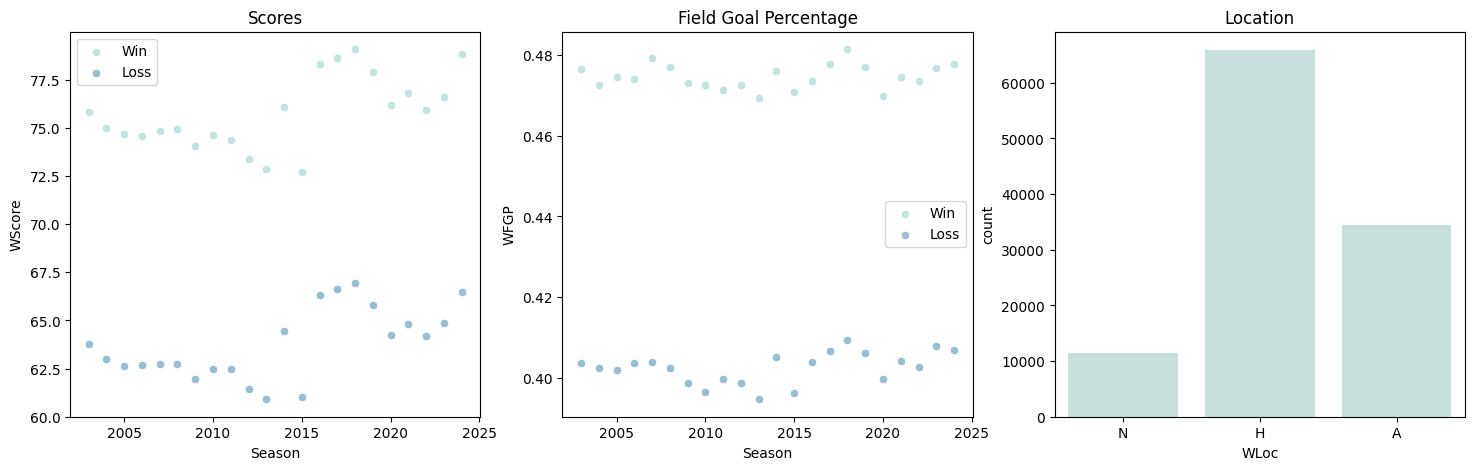

In [15]:
reg_season_uni(mRegSeasonResults)

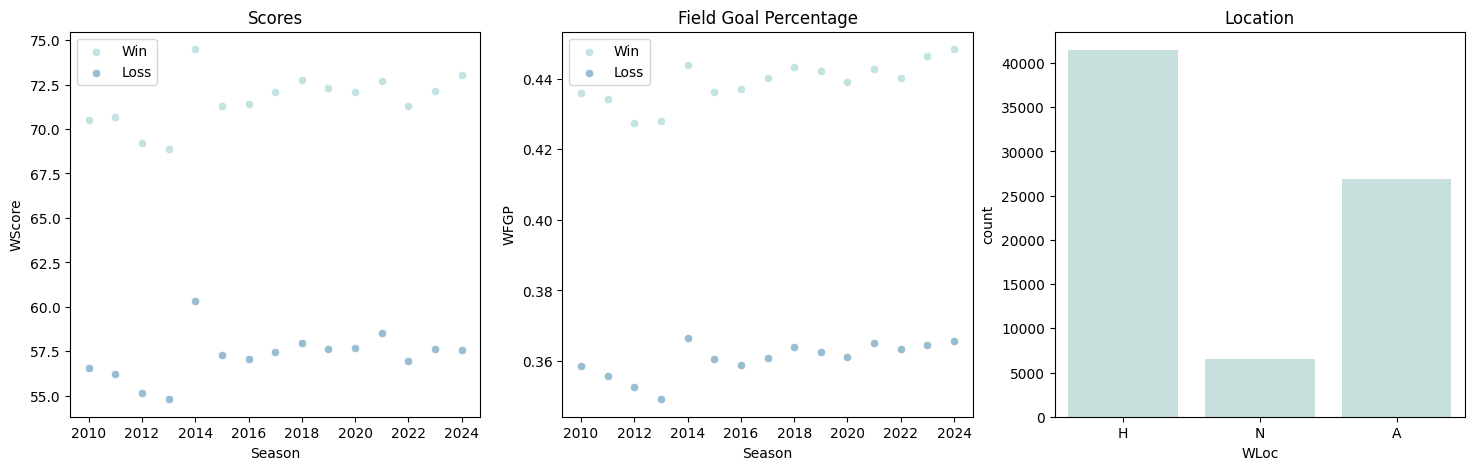

In [16]:
reg_season_uni(wRegSeasonResults)

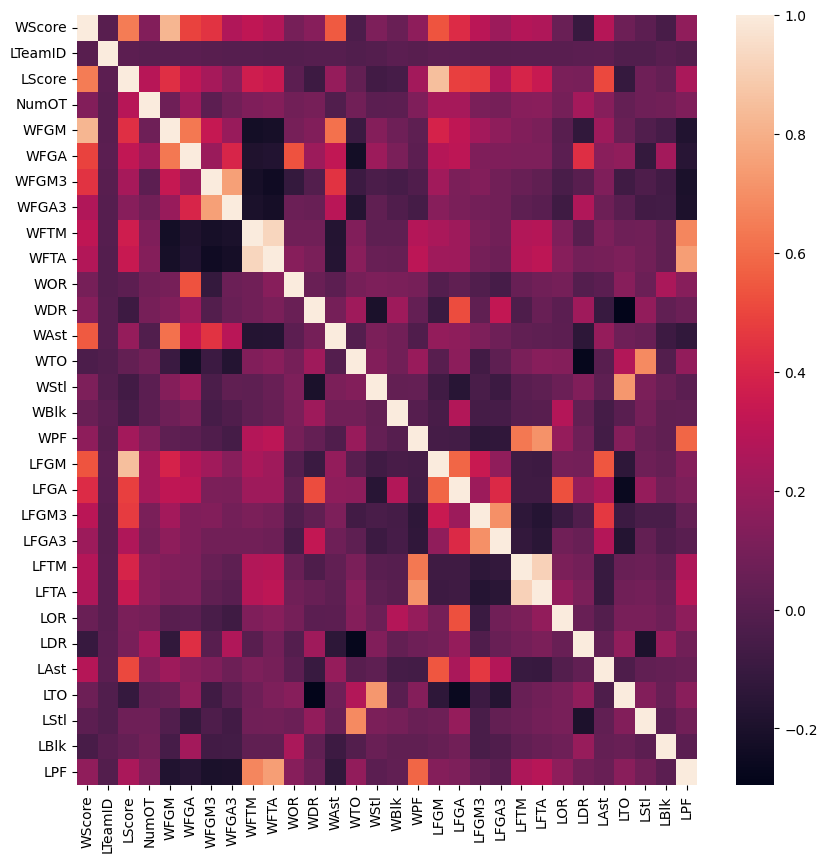

In [17]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(mRegSeasonResults.select(['WScore','LTeamID','LScore','NumOT','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF','LFGM','LFGA','LFGM3','LFGA3',
 'LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']).to_pandas().corr())
plt.show()

In [28]:
# make a df for each team with the season averages
def season_avg_df(raw_df):
    mID_list = mTeams['TeamID'].to_list()
    results_dfs = []
    count = 0
    for team in mID_list:
        for season in range(2003,2025):
            filtered_df = raw_df.filter((raw_df['Season'] == season) & ((raw_df['WTeamID'] == team) | (raw_df['LTeamID'] == team)))

            
            combined_stats = filtered_df.with_columns(
                Season=season,
                TeamID=team,
                Score=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WScore']).otherwise(filtered_df['LScore']).alias('Score'),
                OppScore=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LScore']).otherwise(filtered_df['WScore']).alias('OppScore'),
                FGM=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WFGM']).otherwise(filtered_df['LFGM']).alias('FGM'),
                OppFGM=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LFGM']).otherwise(filtered_df['WFGM']).alias('OppFGM'),
                FGA=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WFGA']).otherwise(filtered_df['LFGA']).alias('FGA'),
                OppFGA=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LFGA']).otherwise(filtered_df['WFGA']).alias('OppFGA'),
                FGM3=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WFGM3']).otherwise(filtered_df['LFGM3']).alias('FGM3'),
                OppFGM3=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LFGM3']).otherwise(filtered_df['WFGM3']).alias('OppFGM3'),
                FGA3=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WFGA3']).otherwise(filtered_df['LFGA3']).alias('FGA3'),
                OppFGA3=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LFGA3']).otherwise(filtered_df['WFGA3']).alias('OppFGA3'),
                FTM=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WFTM']).otherwise(filtered_df['LFTM']).alias('FTM'),
                OppFTM=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LFTM']).otherwise(filtered_df['WFTM']).alias('OppFTM'),
                FTA=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WFTA']).otherwise(filtered_df['LFTA']).alias('FTA'),
                OppFTA=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LFTA']).otherwise(filtered_df['WFTA']).alias('OppFTA'),
                OR=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WOR']).otherwise(filtered_df['LOR']).alias('OR'),
                OppOR=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LOR']).otherwise(filtered_df['WOR']).alias('OppOR'),
                DR=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WDR']).otherwise(filtered_df['LDR']).alias('DR'),
                OppDR=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LDR']).otherwise(filtered_df['WDR']).alias('OppDR'),
                Ast=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WAst']).otherwise(filtered_df['LAst']).alias('Ast'),
                OppAst=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LAst']).otherwise(filtered_df['WAst']).alias('OppAst'),
                TO=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WTO']).otherwise(filtered_df['LTO']).alias('TO'),
                OppTO=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LTO']).otherwise(filtered_df['WTO']).alias('OppTO'),
                Stl=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WStl']).otherwise(filtered_df['LStl']).alias('Stl'),
                OppStl=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LStl']).otherwise(filtered_df['WStl']).alias('OppStl'),
                Blk=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WBlk']).otherwise(filtered_df['LBlk']).alias('Blk'),
                OppBlk=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LBlk']).otherwise(filtered_df['WBlk']).alias('OppBlk'),
                PF=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['WPF']).otherwise(filtered_df['LPF']).alias('PF'),
                OppPF=pl.when(filtered_df['WTeamID'] == team).then(filtered_df['LPF']).otherwise(filtered_df['WPF']).alias('OppPF')
            )

            # Calculate total wins and losses in a season
            win_count = filtered_df.filter(filtered_df['WTeamID'] == team).shape[0]
            loss_count = filtered_df.filter(filtered_df['LTeamID'] == team).shape[0]
            
            # Add the new columns with with_columns
            combined_stats = combined_stats.with_columns(WinCount=win_count, LossCount=loss_count)

            # Aggregate again after adding new columns
            season_averages = combined_stats.groupby(['Season', 'TeamID']).agg(
                Score_avg=combined_stats.select(pl.mean("Score")),
                OppScore_avg=combined_stats.select(pl.mean("OppScore")),
                FGM_avg=combined_stats.select(pl.mean("FGM")),
                OppFGM_avg=combined_stats.select(pl.mean("OppFGM")),
                FGA_avg=combined_stats.select(pl.mean("FGA")),
                OppFGA_avg=combined_stats.select(pl.mean("OppFGA")),
                FGM3_avg=combined_stats.select(pl.mean("FGM3")),
                OppFGM3_avg=combined_stats.select(pl.mean("OppFGM3")),
                FGA3_avg=combined_stats.select(pl.mean("FGA3")),
                OppFGA3_avg=combined_stats.select(pl.mean("OppFGA3")),
                FTM_avg=combined_stats.select(pl.mean("FTM")),
                OppFTM_avg=combined_stats.select(pl.mean("OppFTM")),
                FTA_avg=combined_stats.select(pl.mean("FTA")),
                OppFTA_avg=combined_stats.select(pl.mean("OppFTA")),
                OR_avg=combined_stats.select(pl.mean("OR")),
                OppOR_avg=combined_stats.select(pl.mean("OppOR")),
                DR_avg=combined_stats.select(pl.mean("DR")),
                OppDR_avg=combined_stats.select(pl.mean("OppDR")),
                Ast_avg=combined_stats.select(pl.mean("Ast")),
                OppAst_avg=combined_stats.select(pl.mean("OppAst")),
                TO_avg=combined_stats.select(pl.mean("TO")),
                OppTO_avg=combined_stats.select(pl.mean("OppTO")),
                Stl_avg=combined_stats.select(pl.mean("Stl")),
                OppStl_avg=combined_stats.select(pl.mean("OppStl")),
                Blk_avg=combined_stats.select(pl.mean("Blk")),
                OppBlk_avg=combined_stats.select(pl.mean("OppBlk")),
                PF_avg=combined_stats.select(pl.mean("PF")),
                OppPF_avg=combined_stats.select(pl.mean("OppPF")),
                WinCount=win_count,
                LossCount=loss_count
            )

            
            
            # drop columns with null values because of possibility of new teams joining ncaa and other teams leaving ncaa
            season_averages.drop_nulls()
            
            if season_averages.shape[0] == 1:
                # Calculate the winning percentage
                WinPct = season_averages['WinCount'] / (season_averages['WinCount'] + season_averages['LossCount'])
                season_averages = season_averages.with_columns(WinPct.alias('WinPct'))
                
                results_dfs.append(season_averages)

    # After concatenating the dataframes, reset the index
    final_result = pl.concat(results_dfs)

    print('final result df: ', final_result)


    return final_result
            
        

In [30]:
season_averages = season_avg_df(mRegSeasonResults)

final result df:  shape: (7_617, 33)
┌────────┬────────┬───────────┬──────────────┬───┬───────────┬──────────┬───────────┬──────────┐
│ Season ┆ TeamID ┆ Score_avg ┆ OppScore_avg ┆ … ┆ OppPF_avg ┆ WinCount ┆ LossCount ┆ WinPct   │
│ ---    ┆ ---    ┆ ---       ┆ ---          ┆   ┆ ---       ┆ ---      ┆ ---       ┆ ---      │
│ i32    ┆ i32    ┆ f64       ┆ f64          ┆   ┆ f64       ┆ i32      ┆ i32       ┆ f64      │
╞════════╪════════╪═══════════╪══════════════╪═══╪═══════════╪══════════╪═══════════╪══════════╡
│ 2014   ┆ 1101   ┆ 63.142857 ┆ 78.619048    ┆ … ┆ 18.666667 ┆ 2        ┆ 19        ┆ 0.095238 │
│ 2015   ┆ 1101   ┆ 61.0      ┆ 71.857143    ┆ … ┆ 16.535714 ┆ 7        ┆ 21        ┆ 0.25     │
│ 2016   ┆ 1101   ┆ 69.851852 ┆ 76.259259    ┆ … ┆ 19.666667 ┆ 9        ┆ 18        ┆ 0.333333 │
│ 2017   ┆ 1101   ┆ 67.88     ┆ 72.64        ┆ … ┆ 17.24     ┆ 9        ┆ 16        ┆ 0.36     │
│ 2018   ┆ 1101   ┆ 70.666667 ┆ 72.814815    ┆ … ┆ 17.666667 ┆ 12       ┆ 15        ┆ 0.44

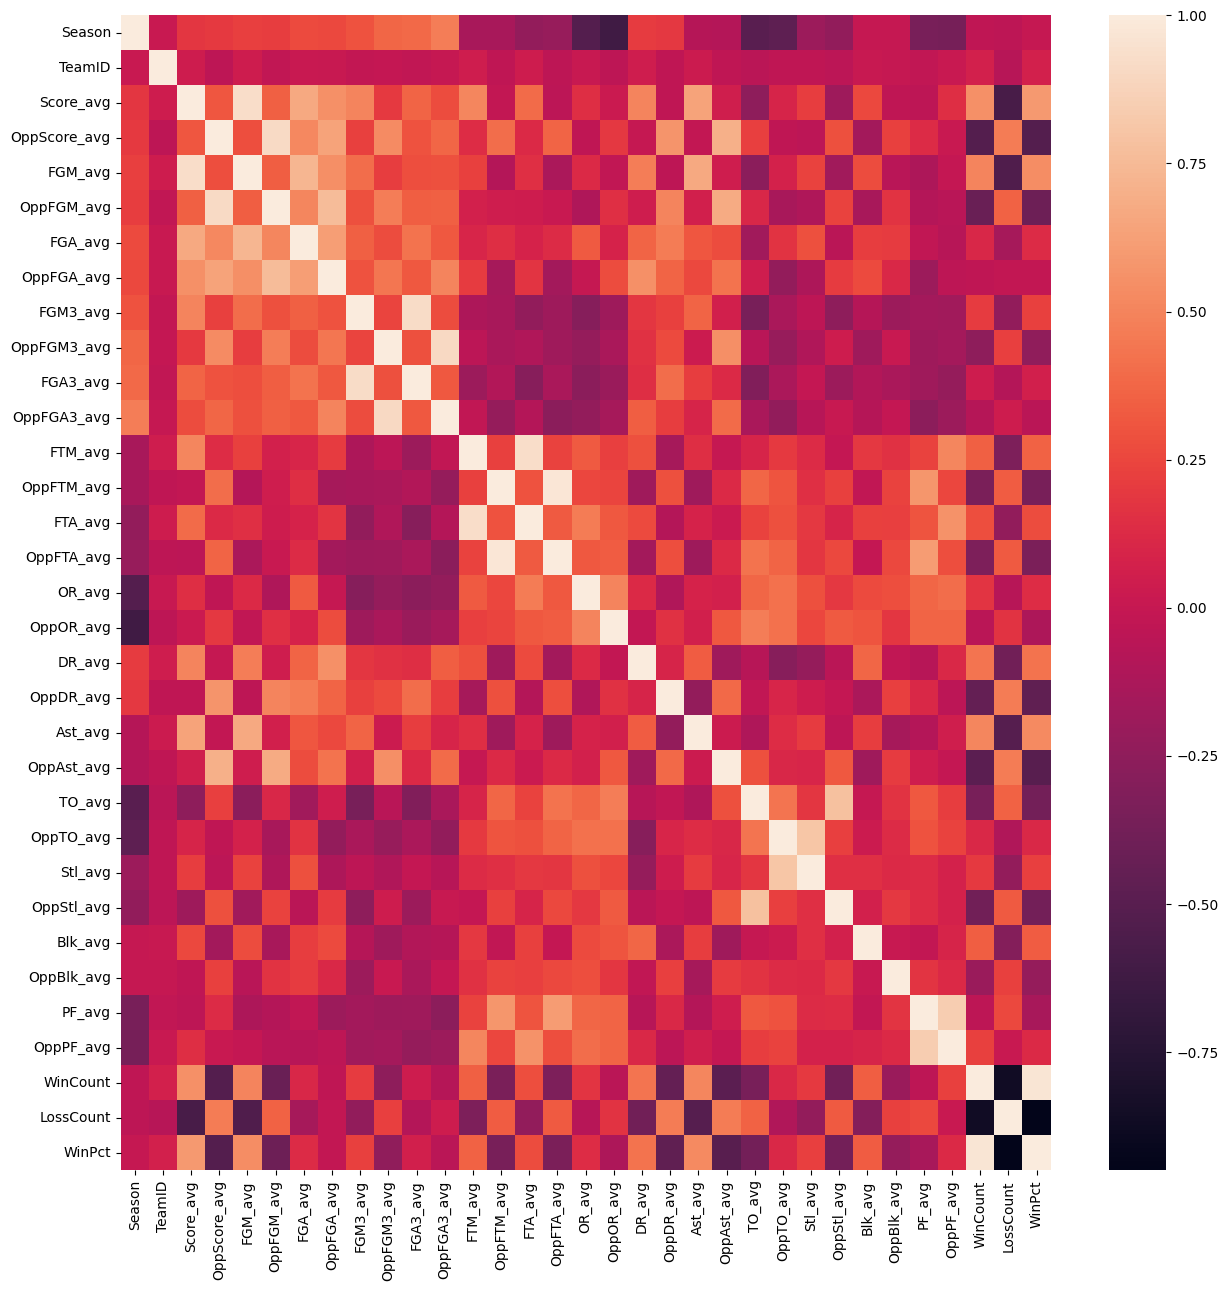

In [35]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(season_averages.select(season_averages.columns).to_pandas().corr())
plt.show()

next we want to analyze how the different teams with the season averages perform in the tournament